## Importante Pacotes e Carregando o Dataset

In [272]:
import warnings
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

warnings.filterwarnings("ignore")

In [273]:
df_original = pd.read_csv("Dados/dados_coletados10k.csv")
df_original.head()

,Contrato,Idade,Sexo,Valor_Renda,UF_Cliente,Perc_Juros,Prazo_Emprestimo,Data_Contratacao,Prazo_Restante,VL_Emprestimo,...,Qt_Renegociacao,Estado_Civil,Escolaridade,Possui_Patrimonio,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago,Possivel_Fraude
0,322068935715,43,M,5800.0,SP,23.0,200,2022-08-01,193,80000.0,...,0,DIVORCIADO,Nenhum,N,0.0,0,NaN,91759.97,7717.08,Nao
1,322068936715,22,M,2000.0,MG,20.0,100,2022-08-01,89,50000.0,...,0,SOLTEIRO(A),NaN,N,0.0,4,103.0,53981.18,6756.59,Nao
2,322068938715,35,M,4000.0,BA,18.0,100,2022-08-01,85,100000.0,...,0,CASADO (A),NaN,N,0.0,0,NaN,101150.02,17929.06,Nao
3,322068939715,20,M,1800.0,MG,20.0,100,2022-08-01,89,30000.0,...,0,SOLTEIRO(A),NaN,N,0.0,13,376.0,36208.10,369.10,Sim
4,322068940715,53,M,2800.0,MG,20.0,100,2022-08-01,87,60000.0,...,0,CASADO (A),NaN,N,0.0,0,NaN,60984.00,11845.24,Nao


# Analise Exploratória - Visão Geral
<br>
Aqui o objetivo desta analise é ter uma visão geral do conjunto de dados, compreendendo seu tamanho, variaveis, 
tipo de dados e período dos dados coletados.

In [274]:
# Verificando a estrutura da base de dados
df_original.shape

(9517, 24)

In [275]:
# Informações sobre a base de dados
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 24 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Contrato                          9517 non-null   int64  
 1   Idade                             9517 non-null   int64  
 2   Sexo                              9517 non-null   object 
 3   Valor_Renda                       9517 non-null   float64
 4   UF_Cliente                        9517 non-null   object 
 5   Perc_Juros                        9517 non-null   float64
 6   Prazo_Emprestimo                  9517 non-null   int64  
 7   Data_Contratacao                  9517 non-null   object 
 8   Prazo_Restante                    9517 non-null   int64  
 9   VL_Emprestimo                     9517 non-null   float64
 10  VL_Emprestimo_ComJuros            9517 non-null   float64
 11  QT_Total_Parcelas_Pagas           9517 non-null   int64  
 12  QT_Tot

In [276]:
# Verificando valores nulos de cada coluna
df_original.isnull().sum()

Contrato                               0
Idade                                  0
Sexo                                   0
Valor_Renda                            0
UF_Cliente                             0
Perc_Juros                             0
Prazo_Emprestimo                       0
Data_Contratacao                       0
Prazo_Restante                         0
VL_Emprestimo                          0
VL_Emprestimo_ComJuros                 0
QT_Total_Parcelas_Pagas                0
QT_Total_Parcelas_Pagas_EmDia          0
QT_Total_Parcelas_Pagas_EmAtraso       0
Qt_Renegociacao                        0
Estado_Civil                           0
Escolaridade                        7105
Possui_Patrimonio                      0
VL_Patrimonio                          0
QT_Parcelas_Atraso                     0
QT_Dias_Atraso                      3594
Saldo_Devedor                          0
Total_Pago                             0
Possivel_Fraude                        0
dtype: int64

- Possuimos valores nulos nas coluna **Escolaridade** e **QT_Dias_Atraso**

In [277]:
# Estatísticas da base de dados
df_original.describe()

,Contrato,Idade,Valor_Renda,Perc_Juros,Prazo_Emprestimo,Prazo_Restante,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago
count,9.517000e+03,9517.000000,9.517000e+03,9517.000000,9517.000000,9517.000000,9517.000000,9517.000000,9517.000000,9517.000000,9517.000000,9517.000000,9517.000000,9517.000000,5923.000000,9517.000000,9517.000000
mean,3.220782e+11,38.738678,8.325404e+03,19.645729,107.425344,104.583482,81881.885048,94164.167805,7.893139,4.108122,1.597247,1.242093,10.927813,5.353788,249.789802,90560.267866,8166.206714
std,5.434161e+06,12.674802,1.218621e+05,3.820652,62.488802,68.568209,94138.059627,108258.768571,5.165751,4.040356,2.313021,1.165580,1025.262221,5.320100,123.221927,111050.541232,16697.758870
min,3.220689e+11,6.000000,4.500000e+02,7.000000,15.000000,0.000000,3500.000000,4025.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000,0.000000
25%,3.220733e+11,29.000000,2.300000e+03,18.000000,60.000000,51.000000,20000.000000,23000.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,162.000000,18546.850000,1202.040000
50%,3.220785e+11,37.000000,3.400000e+03,20.000000,80.000000,80.000000,50000.000000,57500.000000,9.000000,2.000000,1.000000,1.000000,0.000000,4.000000,284.000000,45375.300000,3949.910000
75%,3.220826e+11,46.000000,5.000000e+03,22.000000,190.000000,185.000000,100000.000000,115000.000000,13.000000,6.000000,2.000000,2.000000,0.000000,11.000000,344.000000,119721.250000,8302.010000
max,3.220876e+11,91.000000,8.000080e+06,28.000000,240.000000,227.000000,500000.000000,575000.000000,35.000000,35.000000,14.000000,9.000000,100000.000000,15.000000,435.000000,625000.000000,396385.000000


In [278]:
# valores unicos de cada coluna

for coluna in df_original.columns:
    print(f"{coluna} : {len(df_original[coluna].unique())}")

Contrato : 9517
Idade : 74
Sexo : 2
Valor_Renda : 855
UF_Cliente : 27
Perc_Juros : 21
Prazo_Emprestimo : 36
Data_Contratacao : 110
Prazo_Restante : 79
VL_Emprestimo : 61
VL_Emprestimo_ComJuros : 61
QT_Total_Parcelas_Pagas : 24
QT_Total_Parcelas_Pagas_EmDia : 24
QT_Total_Parcelas_Pagas_EmAtraso : 15
Qt_Renegociacao : 10
Estado_Civil : 6
Escolaridade : 6
Possui_Patrimonio : 2
VL_Patrimonio : 3
QT_Parcelas_Atraso : 16
QT_Dias_Atraso : 16
Saldo_Devedor : 7654
Total_Pago : 7022
Possivel_Fraude : 2


In [279]:
# Avaliando o maior e menor valor da variavel Valor_Renda
print('Maior Renda:', df_original['Valor_Renda'].max())
print('Menor Renda:', df_original['Valor_Renda'].min())

Maior Renda: 8000080.0
Menor Renda: 450.0


In [280]:
# Avaliando o maior e menor valor da variavel QT_Dias_Atraso
print('Maior quantidade de dias atraso: ', df_original['QT_Dias_Atraso'].max())
print('Menor quantidade de dias atraso: ', df_original['QT_Dias_Atraso'].min())

Maior quantidade de dias atraso:  435.0
Menor quantidade de dias atraso:  11.0


In [281]:
# Avaliando o maior e menor valor da variavel Prazo_Restante
print('Maior quantidade de dias restante: ', df_original['Prazo_Restante'].max())
print('Menor quantidade de dias restante: ', df_original['Prazo_Restante'].min())

Maior quantidade de dias restante:  227
Menor quantidade de dias restante:  0


In [282]:
# Quantidade de dias em atraso
df_original['QT_Dias_Atraso'].value_counts(ascending=False)

344.0    930
315.0    718
376.0    686
284.0    546
11.0     532
251.0    471
406.0    413
225.0    352
41.0     255
194.0    241
162.0    206
103.0    205
71.0     190
133.0    176
435.0      2
Name: QT_Dias_Atraso, dtype: int64

In [283]:
# Prazo emprestimo
df_original['Prazo_Emprestimo'].value_counts(ascending=False)

200    1661
80     1421
100     928
60      890
190     674
75      455
90      354
48      333
36      306
30      272
45      205
55      185
50      184
25      183
140     167
20      146
40      136
95      135
70      134
180     129
240     110
120     102
35       81
170      78
235      71
150      48
65       36
160      33
130      21
42       20
19        5
18        4
15        4
165       3
88        2
34        1
Name: Prazo_Emprestimo, dtype: int64

In [284]:
# Prazo restante
df_original['Prazo_Restante'].value_counts(ascending=False)

193    764
91     705
225    534
227    519
64     421
      ... 
12       6
3        3
46       2
0        2
4        2
Name: Prazo_Restante, Length: 79, dtype: int64

In [285]:
# Quantidado por sexo
df_original["Sexo"].value_counts(ascending=False)

M    5706
F    3811
Name: Sexo, dtype: int64

In [286]:
# Quantidade por idade
df_original["Idade"].value_counts(ascending=False)

35    336
34    310
29    298
26    296
32    288
     ... 
87      2
90      2
88      2
6       1
91      1
Name: Idade, Length: 74, dtype: int64

In [287]:
# Estado civil
df_original["Estado_Civil"].value_counts(ascending=False)

SOLTEIRO(A)      5087
CASADO (A)       3027
OUTRO             652
DIVORCIADO        481
VIÚVO(A)          140
UNIÃO ESTAVEL     130
Name: Estado_Civil, dtype: int64

- Observamos que na coluna **Estado_Civil** temos valores **CASADO** e **UNIÃO ESTAVEL** que podem ser a mesma coisa para introduzir nos modelos.

In [288]:
# Escolaridade
df_original["Escolaridade"].value_counts(ascending=False)

Nenhum                                  2184
Ensino Médio                             129
Ensino Superior                           74
Ensino Fundamental                        18
Pós Graduação / Mestrado / Doutorado       7
Name: Escolaridade, dtype: int64

In [289]:
# Clientes possui patrimonio
df_original["Possui_Patrimonio"].value_counts(ascending=False)

N    9452
S      65
Name: Possui_Patrimonio, dtype: int64

In [290]:
# Patrimonio dos clientes
df_original["VL_Patrimonio"].value_counts(ascending=False)

0.0         9512
1000.0         4
100000.0       1
Name: VL_Patrimonio, dtype: int64

In [291]:
# Variavel Target
df_original["Possivel_Fraude"].value_counts(ascending=False)

Nao    5035
Sim    4482
Name: Possivel_Fraude, dtype: int64

### Tratando os dados que identificamos que precisam ser ajustados em nossa análise acima

In [292]:
# Ajustando ESTADO_CIVIL
df_original["Estado_Civil"] = df_original["Estado_Civil"].replace("UNIÃO ESTAVEL", "CASADO (A)")
df_original["Estado_Civil"].value_counts()

SOLTEIRO(A)    5087
CASADO (A)     3157
OUTRO           652
DIVORCIADO      481
VIÚVO(A)        140
Name: Estado_Civil, dtype: int64

In [293]:
# Criando faixa estaria para utilizarmos no modelo preditivo
bins = [0, 21, 30, 40, 50, 60 ,100]
labels = ["Até 21 anos", "De 22 até 30 Anos", "De 31 até 40 Anos", "De 41 até 50 Anos", "De 51 até 60", "Acima de 60 Anos"]

df_original["Faixa_Etaria"] = pd.cut(df_original["Idade"], bins=bins, labels=labels)
df_original["Faixa_Etaria"].value_counts()

De 31 até 40 Anos    2835
De 22 até 30 Anos    2346
De 41 até 50 Anos    2132
De 51 até 60         1071
Acima de 60 Anos      613
Até 21 anos           520
Name: Faixa_Etaria, dtype: int64

In [294]:
# Criando faixa salaria para utilizarmos no modelo prditivo
bins = [-100, 1000, 2000, 3000, 5000, 10000, 20000, 30000, 9000000000]
labels = ['Até 1k', 'De 1k até 2k', 'De 2k até 3k', 'De 3k até 5k', 'De 5k até 10k', 'De 10k até 20k',
          'De 20k até 30k', 'Acima de 50k']

df_original["Faixa_Salarial"] = pd.cut(df_original["Valor_Renda"], bins=bins, labels=labels)
df_original["Faixa_Salarial"].value_counts()

De 3k até 5k      2646
De 2k até 3k      2522
De 1k até 2k      2012
De 5k até 10k     1574
De 10k até 20k     488
De 20k até 30k     137
Acima de 50k       119
Até 1k              19
Name: Faixa_Salarial, dtype: int64

In [295]:
df_original.head()

,Contrato,Idade,Sexo,Valor_Renda,UF_Cliente,Perc_Juros,Prazo_Emprestimo,Data_Contratacao,Prazo_Restante,VL_Emprestimo,...,Escolaridade,Possui_Patrimonio,VL_Patrimonio,QT_Parcelas_Atraso,QT_Dias_Atraso,Saldo_Devedor,Total_Pago,Possivel_Fraude,Faixa_Etaria,Faixa_Salarial
0,322068935715,43,M,5800.0,SP,23.0,200,2022-08-01,193,80000.0,...,Nenhum,N,0.0,0,NaN,91759.97,7717.08,Nao,De 41 até 50 Anos,De 5k até 10k
1,322068936715,22,M,2000.0,MG,20.0,100,2022-08-01,89,50000.0,...,NaN,N,0.0,4,103.0,53981.18,6756.59,Nao,De 22 até 30 Anos,De 1k até 2k
2,322068938715,35,M,4000.0,BA,18.0,100,2022-08-01,85,100000.0,...,NaN,N,0.0,0,NaN,101150.02,17929.06,Nao,De 31 até 40 Anos,De 3k até 5k
3,322068939715,20,M,1800.0,MG,20.0,100,2022-08-01,89,30000.0,...,NaN,N,0.0,13,376.0,36208.10,369.10,Sim,Até 21 anos,De 1k até 2k
4,322068940715,53,M,2800.0,MG,20.0,100,2022-08-01,87,60000.0,...,NaN,N,0.0,0,NaN,60984.00,11845.24,Nao,De 51 até 60,De 2k até 3k


In [296]:
# Trando os valores nulos da coluna QT_Dias_Atraso
# Vamos subistituir o valores nulos pela mediana dos dados

mediana_QT_Dias_Atraso = df_original["QT_Dias_Atraso"].median()

df_original["QT_Dias_Atraso"] = df_original["QT_Dias_Atraso"].fillna(mediana_QT_Dias_Atraso)

In [297]:
# Verificando novamente os valores nulos da coluna
df_original["QT_Dias_Atraso"].isnull().sum()

0

In [298]:
# Vamos agora criar uma faixa de dais de atraso das contas

bins = [-100, 30, 60, 90, 180, 240, 360, 500]
labels = ['Até 30 dias', 'De 31 até 60', 'De 61 até 90', 'De 91 até 180', 'De 181 até 240','De 241 até 360', 'Acima de 360']

df_original["Faixa_Dias_Atraso"] = pd.cut(df_original["QT_Dias_Atraso"], bins=bins, labels=labels)
df_original["Faixa_Dias_Atraso"].value_counts()

De 241 até 360    6259
Acima de 360      1101
De 181 até 240     593
De 91 até 180      587
Até 30 dias        532
De 31 até 60       255
De 61 até 90       190
Name: Faixa_Dias_Atraso, dtype: int64

In [299]:
# Criando faixa de prazo de emprestimo para utilizarmos no modelo preditivo
bins = [0, 60, 120, 200, 720]
labels = ['Até 60 Meses', 'De 61 até 120 Meses', 'De 121 até 200 Meses', 'Acima de 200 Meses']
df_original['Faixa_Prazo_Emprestimo'] = pd.cut(df_original['Prazo_Emprestimo'], bins=bins, labels=labels)
df_original["Faixa_Prazo_Emprestimo"].value_counts()

De 61 até 120 Meses     3567
Até 60 Meses            2955
De 121 até 200 Meses    2814
Acima de 200 Meses       181
Name: Faixa_Prazo_Emprestimo, dtype: int64

In [300]:
# Criando faixa de prazo restante do emprestimo para utilizarmos no modelo preditivo
bins = [-1, 60, 120, 200, 500]
labels = ['Até 60 Meses', 'De 61 até 120 Meses', 'De 121 até 200 Meses', 'Acima de 200 Meses']
df_original['Faixa_Prazo_Restante'] = pd.cut(df_original['Prazo_Restante'], bins=bins, labels=labels)
df_original["Faixa_Prazo_Restante"].value_counts()

De 61 até 120 Meses     3679
Até 60 Meses            2742
De 121 até 200 Meses    2026
Acima de 200 Meses      1070
Name: Faixa_Prazo_Restante, dtype: int64

---

### Após  os ajustes vamos visualizar em formas graficas para melhor avaliação

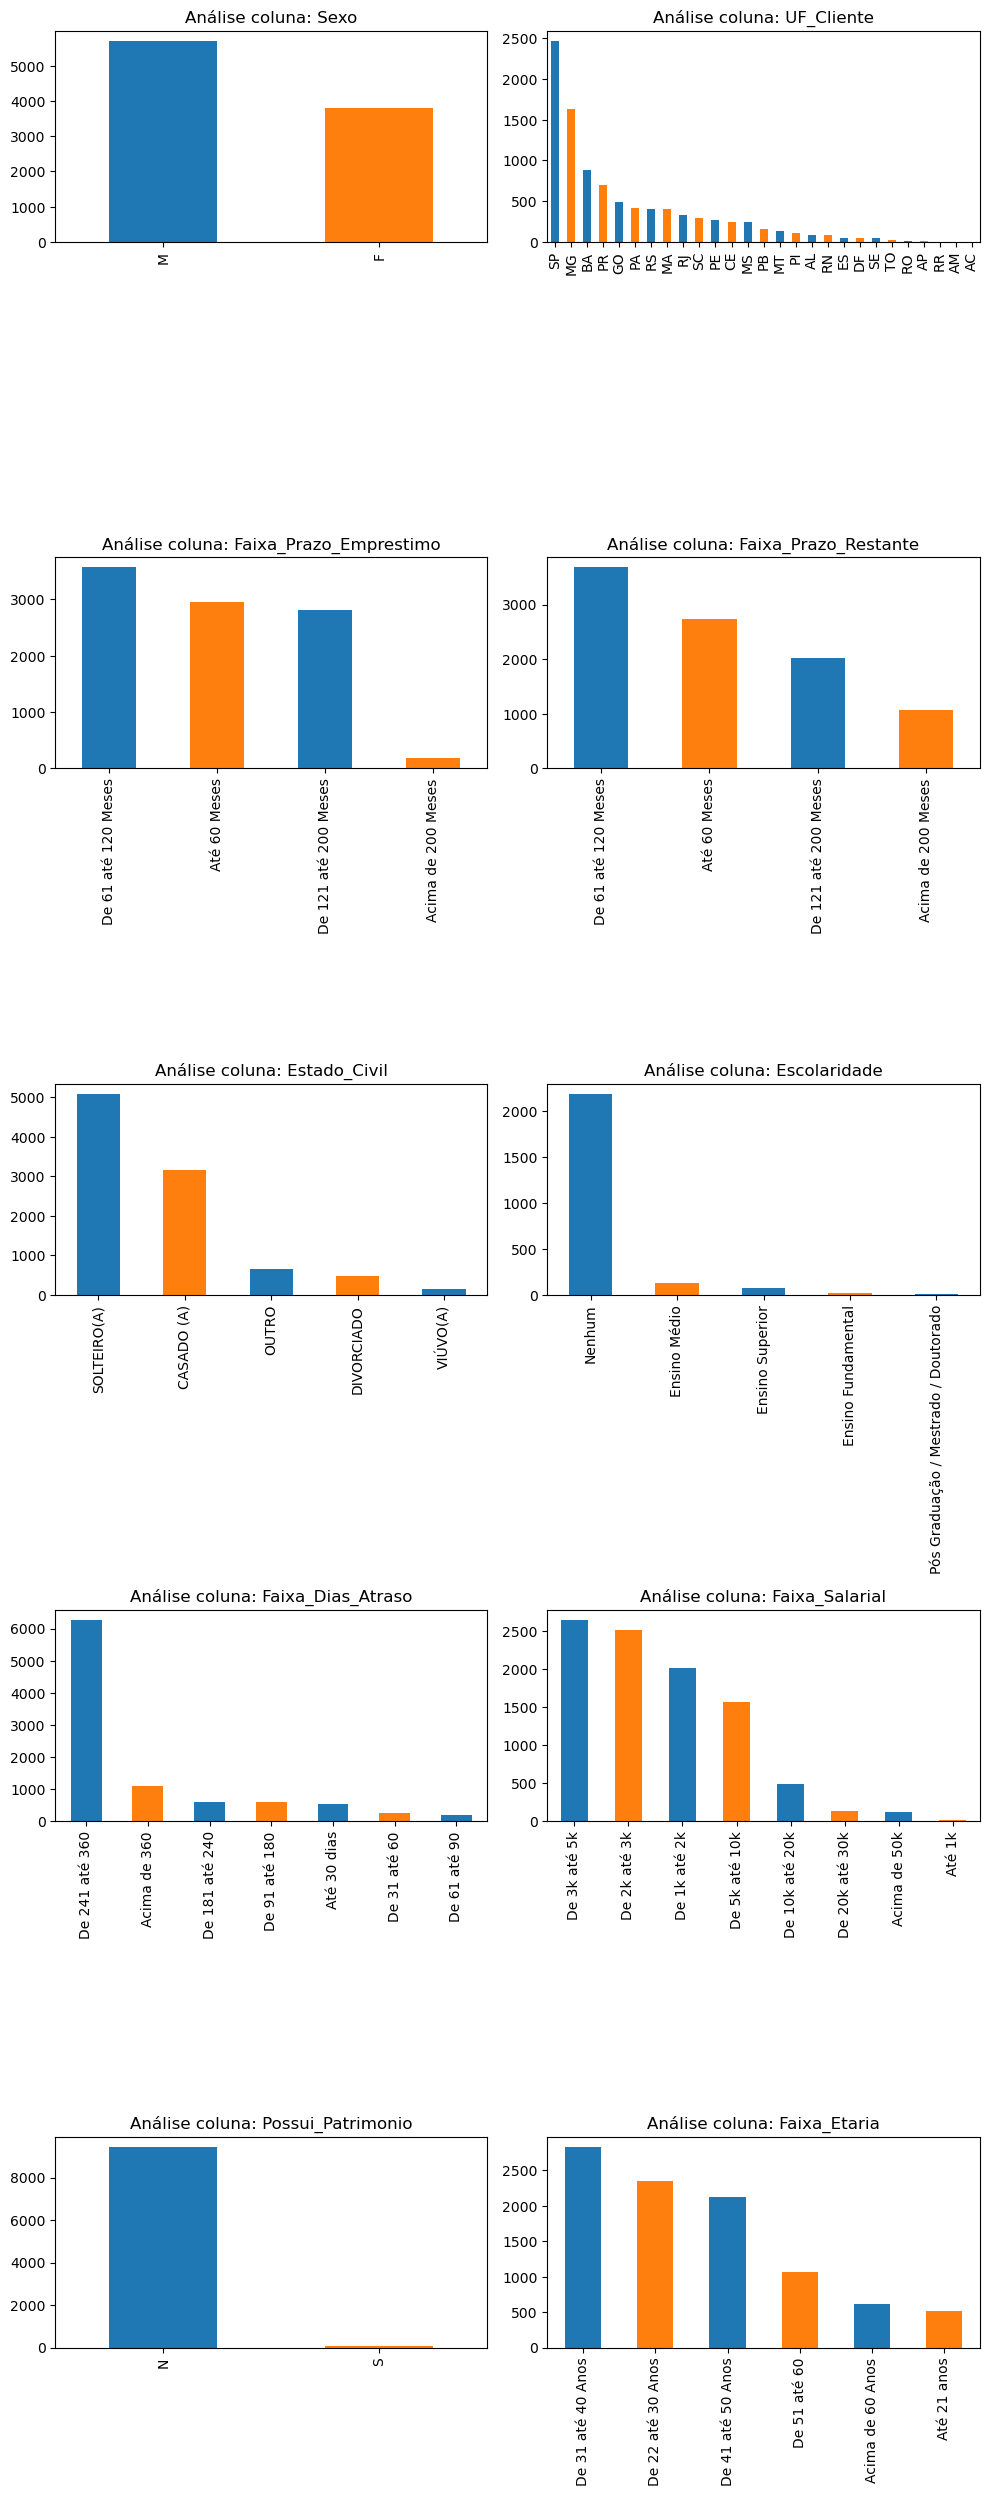

In [301]:
# Gerando Grafico para as colunas
colunas_graficos = ["Sexo", "UF_Cliente", "Faixa_Prazo_Emprestimo", "Faixa_Prazo_Restante", "Estado_Civil", "Escolaridade", "Faixa_Dias_Atraso", "Faixa_Salarial", "Possui_Patrimonio", "Faixa_Etaria"]


num_linhas = 10
num_colunas = 2


plt.figure(figsize=(10, 50))


for i, coluna in enumerate(colunas_graficos, 1):
    plt.subplot(num_linhas, num_colunas, i)
    df_original[coluna].value_counts().plot(kind="bar", title=f"Análise coluna: {coluna}", color=['#1F77B4', '#FF7F0E'])

plt.tight_layout()
plt.show()


<AxesSubplot: title={'center': 'Possiveis Fraudes'}>

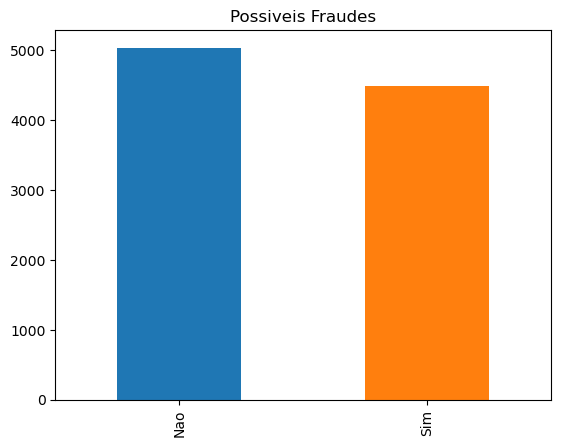

In [302]:
# Verififanco a variavel Possiveis Fraudes que é a Target
# Aqui podemos observar que há mais contas como NÃO POSSÍVEL FRAUDE
# dessa forma, precisaremos balancear o dataset mais adiante.

df_original["Possivel_Fraude"].value_counts().plot(kind="bar", title="Possiveis Fraudes", color=['#1F77B4', '#FF7F0E'])

In [303]:
# Visualizando a base de dados depois da análise
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Contrato                          9517 non-null   int64   
 1   Idade                             9517 non-null   int64   
 2   Sexo                              9517 non-null   object  
 3   Valor_Renda                       9517 non-null   float64 
 4   UF_Cliente                        9517 non-null   object  
 5   Perc_Juros                        9517 non-null   float64 
 6   Prazo_Emprestimo                  9517 non-null   int64   
 7   Data_Contratacao                  9517 non-null   object  
 8   Prazo_Restante                    9517 non-null   int64   
 9   VL_Emprestimo                     9517 non-null   float64 
 10  VL_Emprestimo_ComJuros            9517 non-null   float64 
 11  QT_Total_Parcelas_Pagas           9517 non-null   int64 

In [304]:
# Visualizando as colunas do dataframe para selecinar e retirar algumas.
df_original.columns

Index(['Contrato', 'Idade', 'Sexo', 'Valor_Renda', 'UF_Cliente', 'Perc_Juros',
       'Prazo_Emprestimo', 'Data_Contratacao', 'Prazo_Restante',
       'VL_Emprestimo', 'VL_Emprestimo_ComJuros', 'QT_Total_Parcelas_Pagas',
       'QT_Total_Parcelas_Pagas_EmDia', 'QT_Total_Parcelas_Pagas_EmAtraso',
       'Qt_Renegociacao', 'Estado_Civil', 'Escolaridade', 'Possui_Patrimonio',
       'VL_Patrimonio', 'QT_Parcelas_Atraso', 'QT_Dias_Atraso',
       'Saldo_Devedor', 'Total_Pago', 'Possivel_Fraude', 'Faixa_Etaria',
       'Faixa_Salarial', 'Faixa_Dias_Atraso', 'Faixa_Prazo_Emprestimo',
       'Faixa_Prazo_Restante'],
      dtype='object')

### Após a análise inicial, entendemos que algumas variáveis não possuem relevancia.

- Contrato --> Essa variável é a identificação de cada cliente

- Data_Contratacao, VL_Patrimonio, Possui_Patrimonio, Escolaridade, Idade --> Essas não irão ter relevancia no modelo

- Valor_Renda, Prazo_Emprestimo, QT_Dias_Atraso, Prazo_Restante --> Essas variáveis já transformamos em categoria

In [305]:
# Chamaremos nosso novo conjunto de dados de df_dados

columns = ['Sexo', 'UF_Cliente', 'Perc_Juros', 
       'VL_Emprestimo', 'VL_Emprestimo_ComJuros', 'QT_Total_Parcelas_Pagas',
       'QT_Total_Parcelas_Pagas_EmDia', 'QT_Total_Parcelas_Pagas_EmAtraso',
       'Qt_Renegociacao', 'Estado_Civil', 'QT_Parcelas_Atraso', 'Saldo_Devedor', 
       'Total_Pago', 'Faixa_Prazo_Restante', 'Faixa_Salarial', 'Faixa_Prazo_Emprestimo', 'Faixa_Etaria', 
       'Faixa_Dias_Atraso', 'Possivel_Fraude']

df_dados = pd.DataFrame(df_original, columns=columns)

In [306]:
df_dados.shape

(9517, 19)

In [307]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype   
---  ------                            --------------  -----   
 0   Sexo                              9517 non-null   object  
 1   UF_Cliente                        9517 non-null   object  
 2   Perc_Juros                        9517 non-null   float64 
 3   VL_Emprestimo                     9517 non-null   float64 
 4   VL_Emprestimo_ComJuros            9517 non-null   float64 
 5   QT_Total_Parcelas_Pagas           9517 non-null   int64   
 6   QT_Total_Parcelas_Pagas_EmDia     9517 non-null   int64   
 7   QT_Total_Parcelas_Pagas_EmAtraso  9517 non-null   int64   
 8   Qt_Renegociacao                   9517 non-null   int64   
 9   Estado_Civil                      9517 non-null   object  
 10  QT_Parcelas_Atraso                9517 non-null   int64   
 11  Saldo_Devedor                     9517 non-null   float6

---

## Análise Exploratória em Variáveis Categóricas

<br>
Nesta analise temos 2 objetivos:<br>
1 - Conhecer como a variável alvo (POSSIVEL_FRAUDE) está relacionada com as outras variáveis.<br>
2 - Iremos avaliar as variáveis categóricas para conhecimento dos dados e descartar variáveis que não fazem sentido.

In [308]:
# Selecionando variáveis categóricas
variaveis_cat = ["Sexo", "UF_Cliente", "Estado_Civil", "Faixa_Prazo_Restante", "Faixa_Salarial", "Faixa_Prazo_Emprestimo", "Faixa_Etaria", "Faixa_Dias_Atraso"]

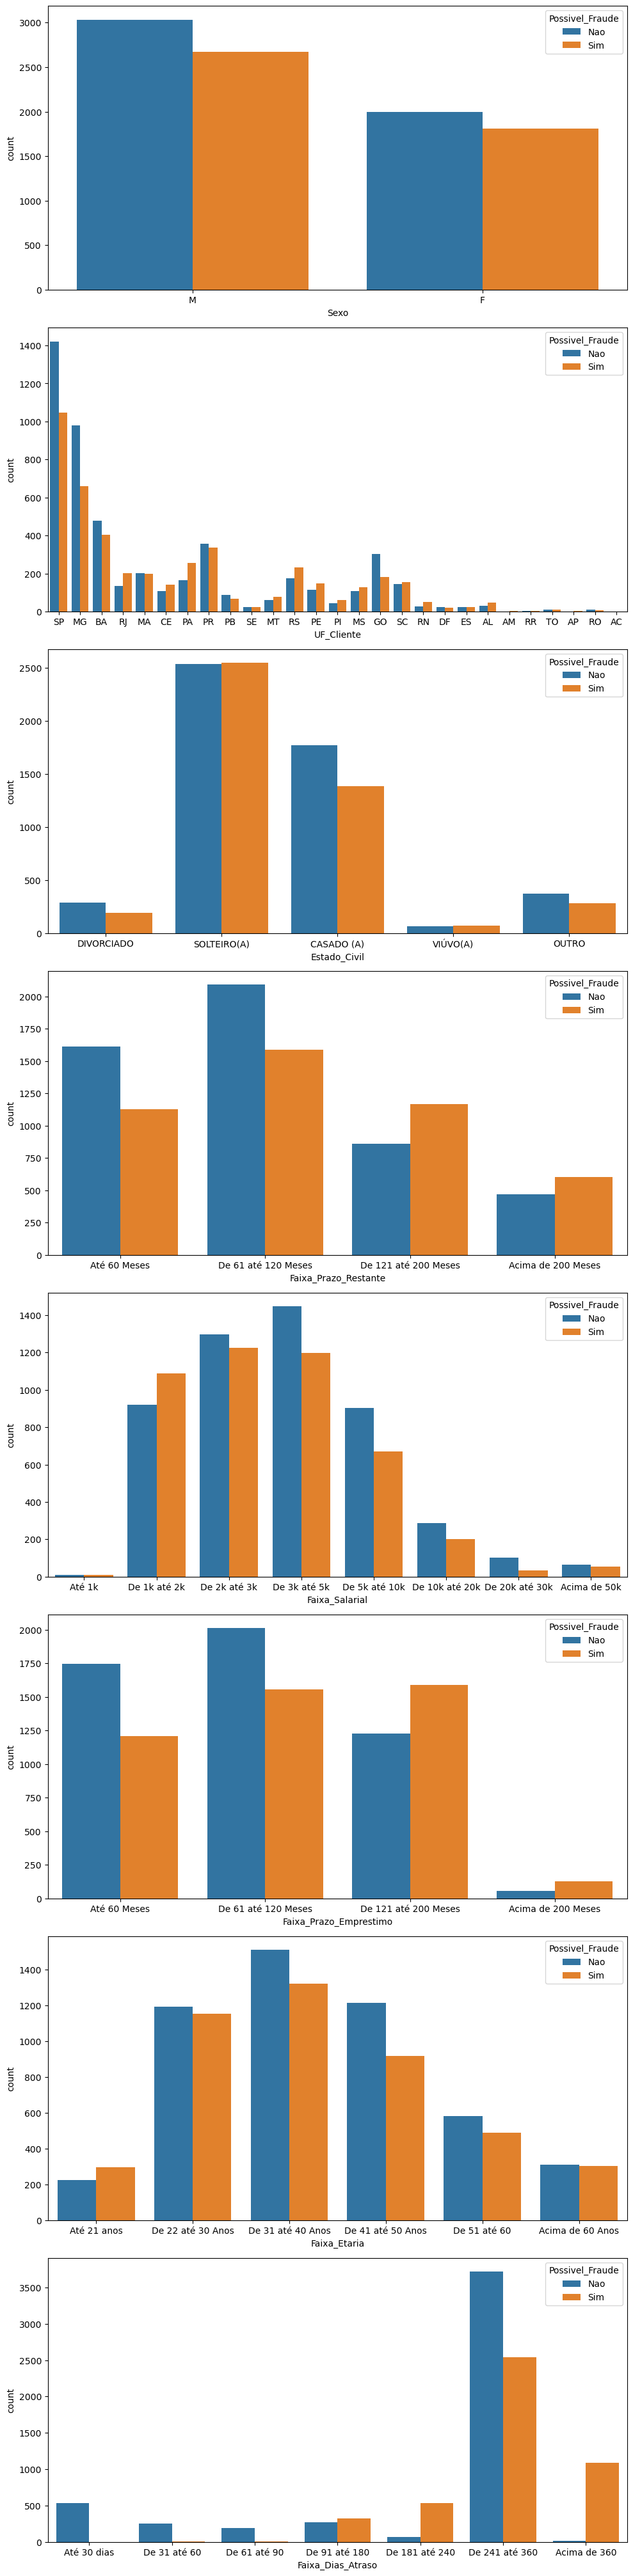

In [309]:
# Visualizando em gráficos, a correlação entre as variáveis categoricas e Target

num_linhas = 10
num_colunas = 1


plt.figure(figsize=(10, 50))


for i, coluna in enumerate(variaveis_cat, 1):
    plt.subplot(num_linhas, num_colunas, i)
    sns.countplot(data= df_dados, x=coluna, hue= "Possivel_Fraude")

plt.tight_layout()
plt.show()

In [310]:
df_dados.describe()

,Perc_Juros,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,QT_Parcelas_Atraso,Saldo_Devedor,Total_Pago
count,9517.000000,9517.000000,9517.000000,9517.000000,9517.000000,9517.000000,9517.000000,9517.000000,9517.000000,9517.000000
mean,19.645729,81881.885048,94164.167805,7.893139,4.108122,1.597247,1.242093,5.353788,90560.267866,8166.206714
std,3.820652,94138.059627,108258.768571,5.165751,4.040356,2.313021,1.165580,5.320100,111050.541232,16697.758870
min,7.000000,3500.000000,4025.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,20000.000000,23000.000000,2.000000,1.000000,0.000000,0.000000,0.000000,18546.850000,1202.040000
50%,20.000000,50000.000000,57500.000000,9.000000,2.000000,1.000000,1.000000,4.000000,45375.300000,3949.910000
75%,22.000000,100000.000000,115000.000000,13.000000,6.000000,2.000000,2.000000,11.000000,119721.250000,8302.010000
max,28.000000,500000.000000,575000.000000,35.000000,35.000000,14.000000,9.000000,15.000000,625000.000000,396385.000000


In [311]:
# Valores unicos de de cada coluna
for coluna in df_dados.columns:
    print(f"{coluna} : {len(df_dados[coluna].unique())}")

Sexo : 2
UF_Cliente : 27
Perc_Juros : 21
VL_Emprestimo : 61
VL_Emprestimo_ComJuros : 61
QT_Total_Parcelas_Pagas : 24
QT_Total_Parcelas_Pagas_EmDia : 24
QT_Total_Parcelas_Pagas_EmAtraso : 15
Qt_Renegociacao : 10
Estado_Civil : 5
QT_Parcelas_Atraso : 16
Saldo_Devedor : 7654
Total_Pago : 7022
Faixa_Prazo_Restante : 4
Faixa_Salarial : 8
Faixa_Prazo_Emprestimo : 4
Faixa_Etaria : 6
Faixa_Dias_Atraso : 7
Possivel_Fraude : 2


# Analise Exploratória - Variáveis Numéricas

<br>
Nesta analise temos diversos objetivos:<br>
1 - Conhecer as variáveis.<br>
2 - Realizar uma analise estatistica nas variáveis para futuros tratamentos. Iremos avaliar média, mediana, moda, desvio padrão
correlações, outliers, distribuição dos dados, etc.  

In [312]:
# Variáveis numéricas

variaveis_numericas = []
for coluna in df_dados.columns:
    if df_dados.dtypes[coluna] == "int64" or df_dados.dtypes[coluna] == "float64":
        variaveis_numericas.append(coluna)

print(variaveis_numericas)

['Perc_Juros', 'VL_Emprestimo', 'VL_Emprestimo_ComJuros', 'QT_Total_Parcelas_Pagas', 'QT_Total_Parcelas_Pagas_EmDia', 'QT_Total_Parcelas_Pagas_EmAtraso', 'Qt_Renegociacao', 'QT_Parcelas_Atraso', 'Saldo_Devedor', 'Total_Pago']


In [313]:
# Quantidade de variáveis
len(variaveis_numericas)

10

## Aplicando o LabelEncoder nas variáveris categoricas

- O LabelEncoder é útil para transformar variáveis categóricas em numéricas, facilitando a análise e o treinamento de modelos de aprendizado de máquina.

In [314]:
# Aplicando o LabelEncoder
 
label_encoder = LabelEncoder()

for coluna in variaveis_cat:
    df_dados[coluna] = label_encoder.fit_transform(df_dados[coluna])

In [315]:
df_dados.head()

,Sexo,UF_Cliente,Perc_Juros,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,QT_Parcelas_Atraso,Saldo_Devedor,Total_Pago,Faixa_Prazo_Restante,Faixa_Salarial,Faixa_Prazo_Emprestimo,Faixa_Etaria,Faixa_Dias_Atraso,Possivel_Fraude
0,1,25,23.0,80000.0,92000.0,15,9,1,0,1,0,91759.97,7717.08,2,7,2,4,3,Nao
1,1,10,20.0,50000.0,57500.0,10,10,0,0,3,4,53981.18,6756.59,3,3,3,2,6,Nao
2,1,4,18.0,100000.0,115000.0,15,5,1,0,0,0,101150.02,17929.06,3,6,3,3,3,Nao
3,1,10,20.0,30000.0,34500.0,1,1,0,0,3,13,36208.10,369.10,3,3,3,1,0,Sim
4,1,10,20.0,60000.0,69000.0,16,16,0,0,0,0,60984.00,11845.24,3,5,3,5,3,Nao


In [316]:
# Verificando o dataframe
df_dados.isnull().sum()

Sexo                                0
UF_Cliente                          0
Perc_Juros                          0
VL_Emprestimo                       0
VL_Emprestimo_ComJuros              0
QT_Total_Parcelas_Pagas             0
QT_Total_Parcelas_Pagas_EmDia       0
QT_Total_Parcelas_Pagas_EmAtraso    0
Qt_Renegociacao                     0
Estado_Civil                        0
QT_Parcelas_Atraso                  0
Saldo_Devedor                       0
Total_Pago                          0
Faixa_Prazo_Restante                0
Faixa_Salarial                      0
Faixa_Prazo_Emprestimo              0
Faixa_Etaria                        0
Faixa_Dias_Atraso                   0
Possivel_Fraude                     0
dtype: int64

In [317]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9517 entries, 0 to 9516
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Sexo                              9517 non-null   int32  
 1   UF_Cliente                        9517 non-null   int32  
 2   Perc_Juros                        9517 non-null   float64
 3   VL_Emprestimo                     9517 non-null   float64
 4   VL_Emprestimo_ComJuros            9517 non-null   float64
 5   QT_Total_Parcelas_Pagas           9517 non-null   int64  
 6   QT_Total_Parcelas_Pagas_EmDia     9517 non-null   int64  
 7   QT_Total_Parcelas_Pagas_EmAtraso  9517 non-null   int64  
 8   Qt_Renegociacao                   9517 non-null   int64  
 9   Estado_Civil                      9517 non-null   int32  
 10  QT_Parcelas_Atraso                9517 non-null   int64  
 11  Saldo_Devedor                     9517 non-null   float64
 12  Total_

In [318]:
# Verificando a quantidade de variavel Target para balanceamento

df_dados["Possivel_Fraude"].value_counts()

Nao    5035
Sim    4482
Name: Possivel_Fraude, dtype: int64

## Precisamos balancear a variavel Target

- Balancear a variável target é importante para evitar viés nos modelos de aprendizado de máquina, garantindo que todas as classes tenham uma representação adequada e contribuam igualmente para a precisão do modelo.

In [319]:
#Separar variaveis preditoras e target
PREDITORAS = df_dados.iloc[:, 0:18]  
TARGET = df_dados.iloc[:, 18] 

In [320]:
# Aplicando o SMOTE para balancear a coluna
bld = SMOTE(random_state=42)

PREDITORAS_RES, TARGER_RES = bld.fit_resample(PREDITORAS, TARGET)

<AxesSubplot: title={'center': 'Possiveis Fraudes X Não Fraudes'}>

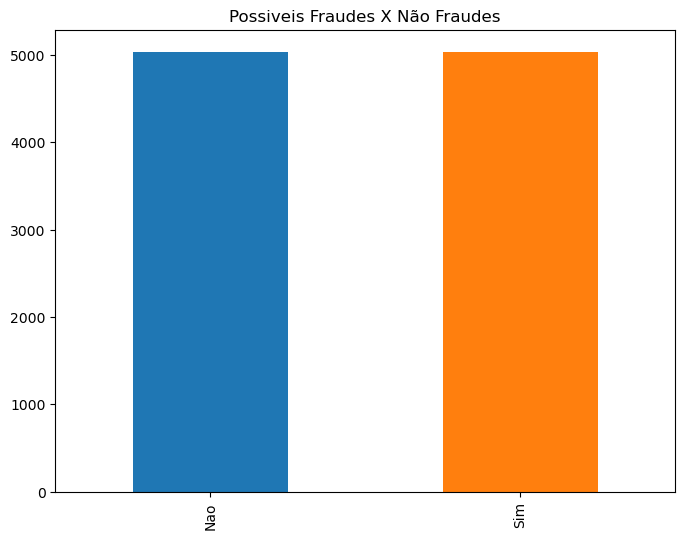

In [321]:
# Visualizando a Target balanceada

plt.figure(figsize=(8,6))
TARGER_RES.value_counts().plot(kind="bar", title="Possiveis Fraudes X Não Fraudes", color=['#1F77B4', '#FF7F0E'])

In [322]:
# Separado os dados em dados de Treino e Teste.
X_treino, X_teste, y_treino, y_teste = train_test_split(PREDITORAS_RES, TARGER_RES, test_size=0.3, random_state=42)

In [323]:
X_treino.head()

,Sexo,UF_Cliente,Perc_Juros,VL_Emprestimo,VL_Emprestimo_ComJuros,QT_Total_Parcelas_Pagas,QT_Total_Parcelas_Pagas_EmDia,QT_Total_Parcelas_Pagas_EmAtraso,Qt_Renegociacao,Estado_Civil,QT_Parcelas_Atraso,Saldo_Devedor,Total_Pago,Faixa_Prazo_Restante,Faixa_Salarial,Faixa_Prazo_Emprestimo,Faixa_Etaria,Faixa_Dias_Atraso
7012,0,17,19.0,500000.0,575000.0,1,1,0,1,4,12,600296.26,1942.30,0,7,2,5,3
8541,0,25,20.0,140000.0,161000.0,5,3,1,1,0,8,167073.02,2485.00,0,6,2,5,2
3903,0,4,28.0,12000.0,13800.0,1,1,0,0,0,13,15717.44,332.66,1,6,1,2,0
1844,0,25,18.0,50000.0,57500.0,13,5,3,5,3,0,13084.40,26422.41,1,3,1,1,3
8303,1,9,21.0,15000.0,17250.0,13,3,4,1,3,0,14096.18,4423.11,1,6,1,2,3


## Precisamos fazer a Normalização dos dados

- Normalizar os dados é crucial para garantir que todas as características contribuam igualmente para a análise ou modelo, removendo disparidades de escala e permitindo uma melhor interpretação dos padrões nos dados.

In [324]:
# Normalizando os dados

Normalizador = MinMaxScaler()
X_treino_normalizados = Normalizador.fit_transform(X_treino)
X_teste_normalizados = Normalizador.fit_transform(X_teste)

In [325]:
X_treino_normalizados

array([[0.        , 0.65384615, 0.57142857, ..., 0.66666667, 1.        ,
        0.5       ],
       [0.        , 0.96153846, 0.61904762, ..., 0.66666667, 1.        ,
        0.33333333],
       [0.        , 0.15384615, 1.        , ..., 0.33333333, 0.4       ,
        0.        ],
       ...,
       [1.        , 0.96153846, 0.71428571, ..., 0.66666667, 0.4       ,
        0.5       ],
       [1.        , 0.88461538, 0.57142857, ..., 0.66666667, 0.8       ,
        1.        ],
       [1.        , 0.96153846, 0.85714286, ..., 1.        , 0.8       ,
        0.5       ]])

# Criando, Treinando e Avaliando os Modelos de Machine Learning

# Modelo: <span style="color:blue">Random Forest</span>

In [326]:
# Construtor do Modelo
randomForest = RandomForestClassifier()

In [327]:
# Parametros default
randomForest.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [328]:
# Valores para o grid de hiperparametros
n_estimators = np.array([100,200,300])
max_depth = np.array([10,20])
criterion = np.array(["gini", "entropy"])
max_features = np.array(["sqrt", "log2", None])
min_samples_split = np.array([1,2,5])
min_samples_leaf = np.array([1,2,3])


# Grid de hiperparâmetros
grid_parametros = dict(n_estimators = n_estimators,
                       max_depth = max_depth,
                       criterion = criterion,
                       max_features = max_features,
                       min_samples_split = min_samples_split,
                       min_samples_leaf = min_samples_leaf)

# Criando o modelo com o Grid de Hiperparametros
randomForest = GridSearchCV(randomForest, grid_parametros, cv = 3, n_jobs = 8)

# Treinando os modelos
inicio = time.time()
randomForest.fit(X_treino_normalizados, y_treino)
fim = time.time()

# Obtendo e visualizando os parametros treinados
treinos_rf = pd.DataFrame(randomForest.cv_results_)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {randomForest.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {randomForest.best_params_}")
print("")
print("Tempo de Treinamento do Modelo: ", round(fim - inicio,2))
print("")
print("Numero de treinamentos realizados: ", treinos_rf.shape[0])

Acurácia em Treinamento: 99.25%

Hiperparâmetros Ideais: {'criterion': 'gini', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 1, 'n_estimators': 300}

Tempo de Treinamento do Modelo:  353.9

Numero de treinamentos realizados:  324


In [329]:
# Criando o classificador com Random Forest
clf = RandomForestClassifier(n_estimators  = 100, criterion = 'entropy', max_depth = 20, 
                             max_features = 'log2', min_samples_leaf = 1, min_samples_split = 1, n_jobs = 8)

# Construção do modelo
clf = clf.fit(X_treino_normalizados, y_treino)

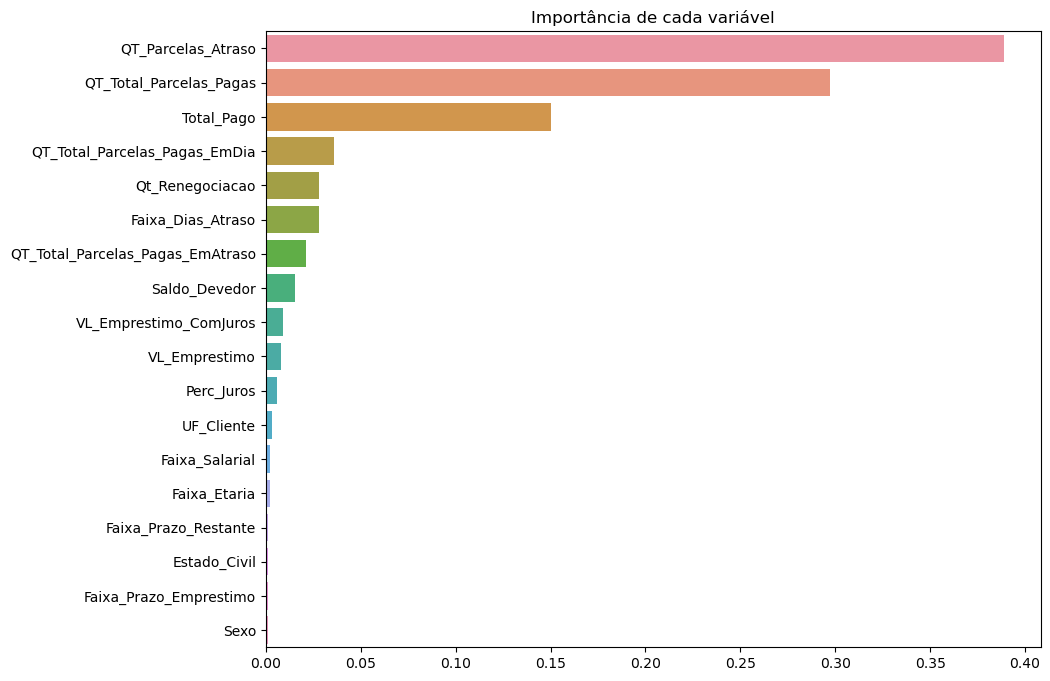

In [330]:
# Visualizando a importância de cada variável no treinamento Random Forest

plt.figure(figsize=(10,8))

V_importantes = pd.Series(data=clf.feature_importances_, index=PREDITORAS_RES.columns)
V_importantes = V_importantes.sort_values(ascending=False)

sns.barplot(x=V_importantes, y=V_importantes.index, orient="h").set_title("Importância de cada variável")
plt.show()

In [331]:
# Visualizando o percentual de importância de cada variável

V_importantes.sort_values(ascending=False)

QT_Parcelas_Atraso                  0.388874
QT_Total_Parcelas_Pagas             0.297139
Total_Pago                          0.149978
QT_Total_Parcelas_Pagas_EmDia       0.036147
Qt_Renegociacao                     0.028088
Faixa_Dias_Atraso                   0.027807
QT_Total_Parcelas_Pagas_EmAtraso    0.021086
Saldo_Devedor                       0.015550
VL_Emprestimo_ComJuros              0.008975
VL_Emprestimo                       0.008208
Perc_Juros                          0.006037
UF_Cliente                          0.003219
Faixa_Salarial                      0.002263
Faixa_Etaria                        0.001969
Faixa_Prazo_Restante                0.001349
Estado_Civil                        0.001242
Faixa_Prazo_Emprestimo              0.001120
Sexo                                0.000950
dtype: float64

In [332]:
# Score com dados de Treino
scores = clf.score(X_treino_normalizados,y_treino)
scores

1.0

In [333]:
# Score com dados de Teste
scores = clf.score(X_teste_normalizados, y_teste)
round(scores, 2)

0.99

In [334]:
# Dicionário de métricas e metadados
modelo_rf = {'Melhores Hiperparametros':randomForest.best_params_,
               'Numero de Modelos Treinados': treinos_rf.shape[0],  
               'Melhor Score': round(randomForest.best_score_ * 100,2)}

In [335]:
modelo_rf

{'Melhores Hiperparametros': {'criterion': 'gini',
  'max_depth': 20,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'min_samples_split': 1,
  'n_estimators': 300},
 'Numero de Modelos Treinados': 324,
 'Melhor Score': 99.25}

---

# Modelo: <span style="color:blue">SVM</span>

In [336]:
# Construtor do modelo
modelo_svm = SVC()

In [337]:
# Parametros default
modelo_svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [338]:
# Valores para o grid de hiperparametros
grid_parametros = {'C': [0.1,1,10,100],
                   'gamma': [1,0.1,0.01,0.001],
                   'degree' : [2,3,4,],
                   'coef0' : [0.5,1],
                   'max_iter': [-1, 1]}


svm = GridSearchCV(modelo_svm, grid_parametros, n_jobs = 8)

# Treinando os modelos
inicio = time.time()
svm.fit(X_treino_normalizados, y_treino)
fim = time.time()

# Obtendo e visualizando os parametros treinados
treinos_svm = pd.DataFrame(svm.cv_results_)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {svm.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {svm.best_params_}")
print("")
print("Tempo de Treinamento do Modelo: ", round(fim - inicio,2))
print("")
print("Numero de treinamentos realizados: ", int(treinos_svm.shape[0]))

Acurácia em Treinamento: 98.94%

Hiperparâmetros Ideais: {'C': 100, 'coef0': 0.5, 'degree': 2, 'gamma': 0.01, 'max_iter': -1}

Tempo de Treinamento do Modelo:  100.31

Numero de treinamentos realizados:  192


In [339]:
# Dicionário de métricas e metadados
modelo_svm = {'Melhores Hiperparametros':svm.best_params_,
               'Numero de Modelos Treinados': treinos_svm.shape[0],  
               'Melhor Score': round(svm.best_score_ * 100,2)}

In [340]:
modelo_svm

{'Melhores Hiperparametros': {'C': 100,
  'coef0': 0.5,
  'degree': 2,
  'gamma': 0.01,
  'max_iter': -1},
 'Numero de Modelos Treinados': 192,
 'Melhor Score': 98.94}

---

# Modelo: <span style="color:blue">KNN</span>

In [341]:
# Construtor
modelo_knn = KNeighborsClassifier()

In [342]:
# Parametros
modelo_knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [343]:
# Valores para o grid de hiperparametros
n_neighbors = np.array([3,4,5,6,7])
algorithm = np.array(['auto', 'ball_tree', 'kd_tree', 'brute'])
leaf_size = np.array([30,31,32])
metric =  np.array(['minkowski','euclidean'])


# Grid de hiperparâmetros
grid_parametros = dict(n_neighbors = n_neighbors,
                       algorithm = algorithm,
                       leaf_size = leaf_size,
                       metric = metric)

knn = GridSearchCV(modelo_knn, grid_parametros, n_jobs = 8)

# Treinando os modelos
inicio = time.time()
knn.fit(X_treino_normalizados, y_treino)
fim = time.time()

# Obtendo e visualizando os parametros treinados
treinos_knn = pd.DataFrame(knn.cv_results_)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {knn.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {knn.best_params_}")
print("")
print("Tempo de Treinamento do Modelo: ", round(fim - inicio,2))
print("")
print("Numero de treinamentos realizados: ", treinos_knn.shape[0])

Acurácia em Treinamento: 97.08%

Hiperparâmetros Ideais: {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'n_neighbors': 7}

Tempo de Treinamento do Modelo:  24.82

Numero de treinamentos realizados:  120


In [344]:
# Dicionário de métricas e metadados
modelo_knn = {'Melhores Hiperparametros':knn.best_params_,
               'Numero de Modelos Treinados': treinos_knn.shape[0],  
               'Melhor Score': round(knn.best_score_ * 100,2)}

modelo_knn

{'Melhores Hiperparametros': {'algorithm': 'auto',
  'leaf_size': 30,
  'metric': 'minkowski',
  'n_neighbors': 7},
 'Numero de Modelos Treinados': 120,
 'Melhor Score': 97.08}

---

In [345]:
# Gerando o DataFrame com todos os valores de todos os modelos treinados
resumo = pd.DataFrame({'Modelo ML': ["Random Forest", "SVM", "KNN"],
                       "Melhor Score" : [pd.Series(modelo_rf)[2], pd.Series(modelo_svm)[2], pd.Series(modelo_knn)[2]],
                       "Numero de Modelos Treinados" : [pd.Series(modelo_rf)[1], pd.Series(modelo_svm)[1], pd.Series(modelo_knn)[1]],
                       'Melhores Hiperparametros' : [pd.Series(modelo_rf)[0], pd.Series(modelo_svm)[0], pd.Series(modelo_knn)[0]]
                       })

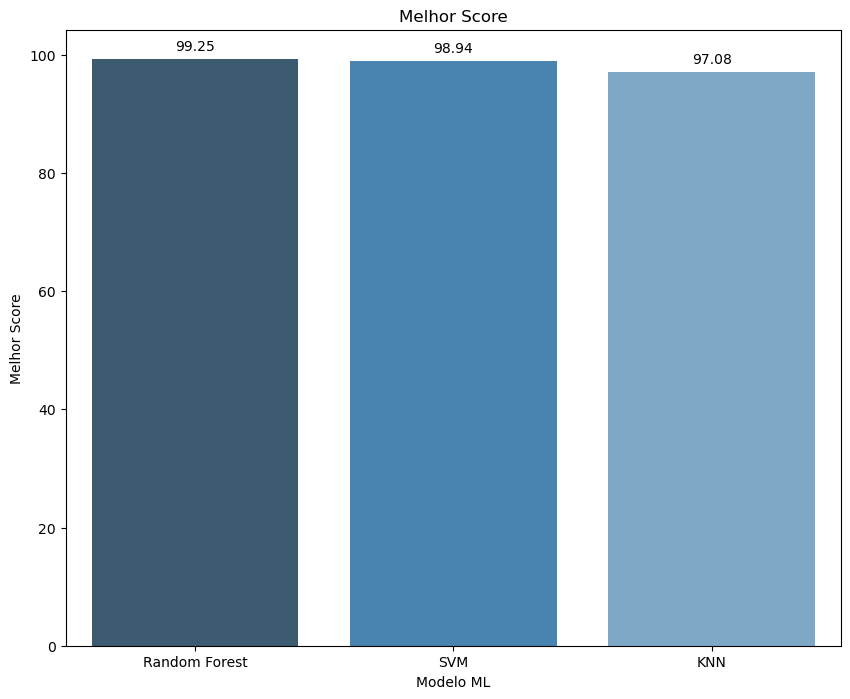

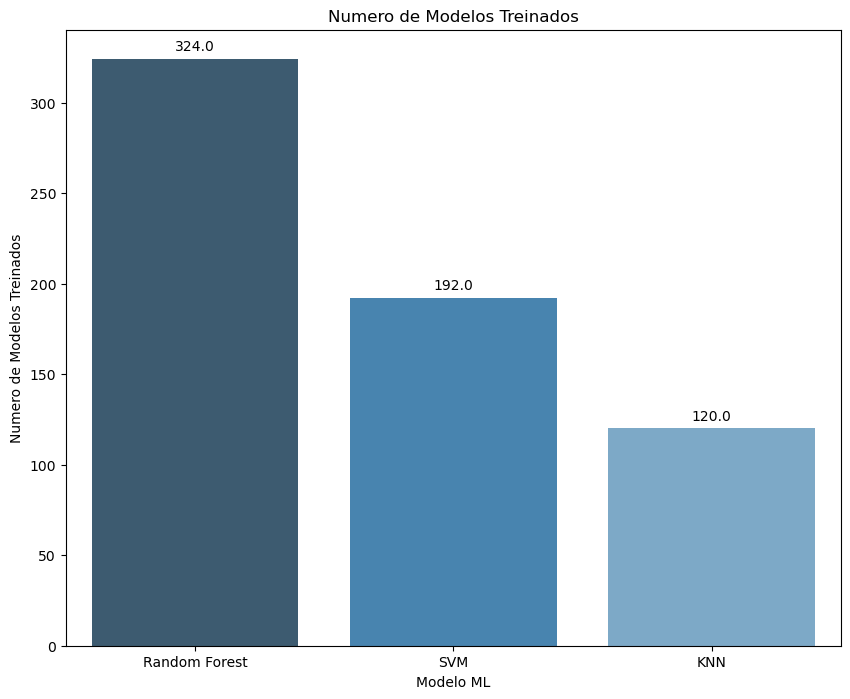

In [346]:
# Gráficos finais

for coluna in resumo.columns:
    
    if coluna != "Melhores Hiperparametros" and coluna != "Modelo ML":
        plt.figure(figsize=(10,8))

        palette = sns.color_palette("Blues_d", len(resumo))[::-1]

        ax = sns.barplot(x=resumo["Modelo ML"], y=resumo[coluna], palette=palette)


        for p in ax.patches:
            ax.annotate(format(f"{p.get_height()}"),
                        (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha = 'center', va = 'center',
                        xytext = (0, 9),
                        textcoords = 'offset points')

        plt.title(coluna)
        plt.show()
        print()